PART 1

In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
plt.rc("font", size=16)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve

In [39]:
data = pd.read_csv('FlightDelays.csv', header = 0)
data = data.dropna()
print(data.shape)
print( list (data.columns))

(2201, 13)
['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE', 'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM', 'Flight_Status']


In [40]:
data.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01-01-2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01-01-2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01-01-2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01-01-2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01-01-2004,7814,IAD,0,4,1,N685BR,ontime


In [41]:
data['Flight_Status'] = (data['Flight_Status'] !='ontime').astype(int)

In [42]:
data.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,0
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,0
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,0
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,0
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,0
5,840,DH,839,JFK,228,01-01-2004,7800,IAD,0,4,1,N687BR,0
6,1240,DH,1243,JFK,228,01-01-2004,7806,IAD,0,4,1,N321UE,0
7,1645,DH,1644,JFK,228,01-01-2004,7810,IAD,0,4,1,N301UE,0
8,1715,DH,1710,JFK,228,01-01-2004,7812,IAD,0,4,1,N328UE,0
9,2120,DH,2129,JFK,228,01-01-2004,7814,IAD,0,4,1,N685BR,0


**Data Analysis**

In [43]:
data['Flight_Status'].value_counts()

0    1773
1     428
Name: Flight_Status, dtype: int64

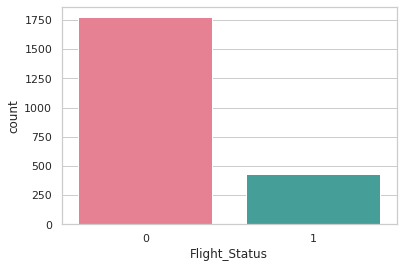

<Figure size 432x288 with 0 Axes>

In [44]:
sns.countplot(x = 'Flight_Status', data = data, palette='husl')
plt.show()
plt.savefig('count_plot')

In [45]:
count_no_delay = len(data[data['Flight_Status']==1])
count_no_on_time = len(data[data['Flight_Status']==0])
pct_of_no_on_time = count_no_on_time/(count_no_on_time+count_no_delay)
print("percentage of ontime is", pct_of_no_on_time*100)
pct_of_no_of_delayed = count_no_delay/(count_no_delay+count_no_on_time)
print("percentage of delay is", pct_of_no_of_delayed*100)

percentage of ontime is 80.5542935029532
percentage of delay is 19.445706497046796


In [46]:

data.groupby('Flight_Status').mean()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
Flight_Status,,,,,,,
0,1348.032713,1332.325437,211.99436,3696.250423,0.000000,3.943598,15.741117
1,1470.969626,1522.462617,211.36215,4307.366822,0.074766,3.747664,17.200935


Weather plays an important role to predict Flight Status.

In [47]:
data.groupby('Weather').mean()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,DAY_WEEK,DAY_OF_MONTH,Flight_Status
Weather,,,,,,,
0,1372.372983,1368.278008,211.817888,3802.773628,3.934071,15.873213,0.182573
1,1342.500000,1438.500000,215.500000,4649.656250,1.968750,26.312500,1.000000


In [48]:
data.groupby('CARRIER').mean()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,Flight_Status
CARRIER,,,,,,,,
CO,1419.500000,1413.234043,199.000000,841.265957,0.021277,3.744681,16.159574,0.276596
DH,1448.673321,1464.225045,223.107078,7484.598911,0.019964,3.989111,15.992740,0.248639
DL,1369.368557,1373.587629,213.920103,1674.051546,0.007732,3.860825,16.340206,0.121134
MQ,1312.966102,1305.769492,213.691525,4902.867797,0.033898,3.789831,15.738983,0.271186
OH,1455.000000,1483.000000,184.000000,5935.000000,0.000000,4.033333,16.433333,0.133333
RU,1344.473039,1343.446078,195.039216,2522.916667,0.007353,4.022059,15.605392,0.230392
UA,850.000000,864.870968,229.000000,846.000000,0.064516,4.096774,16.000000,0.161290
US,1363.366337,1328.252475,214.000000,2139.623762,0.002475,3.814356,16.339109,0.086634


In [49]:
data.groupby('DEST').mean()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,Flight_Status
DEST,,,,,,,,
EWR,1357.568421,1361.308271,200.001504,3457.278195,0.012030,3.957895,15.810526,0.242105
JFK,1475.103627,1488.883420,218.790155,6263.173575,0.020725,4.155440,15.935233,0.217617
LGA,1345.620870,1333.780870,216.413043,3200.286957,0.013913,3.791304,16.179130,0.159130


**Bar Graphs**

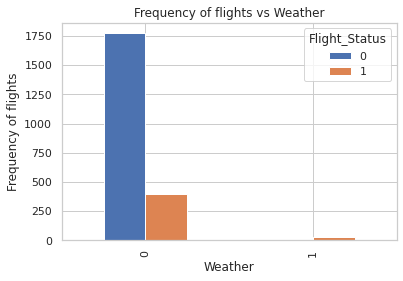

In [50]:

%matplotlib inline
pd.crosstab(data.Weather,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency of flights')
plt.savefig('Flight_Status_weather')

Bad weather directly implies that the flight is delayed. 

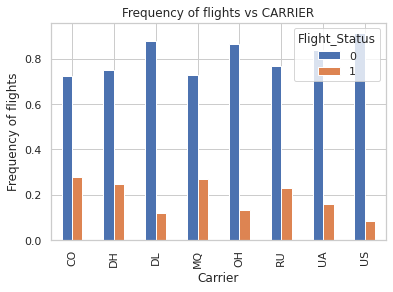

In [52]:
table=pd.crosstab(data.CARRIER,data.Flight_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Frequency of flights vs CARRIER')
plt.xlabel('Carrier')
plt.ylabel('Frequency of flights')
plt.savefig('Flight_Status_carrier')

Some of the carriers are biased towards Flight_Status so this can also be a useful feature.

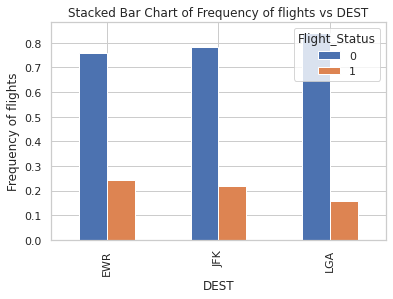

In [53]:
table=pd.crosstab(data.DEST,data.Flight_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Frequency of flights vs DEST')
plt.xlabel('DEST')
plt.ylabel('Frequency of flights')
plt.savefig('dest_vs_Flight_Status')

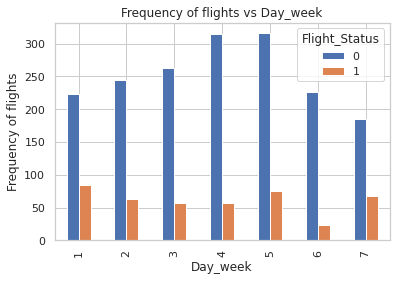

In [54]:

pd.crosstab(data.DAY_WEEK,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs Day_week')
plt.xlabel('Day_week')
plt.ylabel('Frequency of flights')
plt.savefig('Flight_Status_dayweek')

  It's visible that on few days the ratio of flight_delayed and flight_on_time is relatively higher so this can be a good feature to use.  

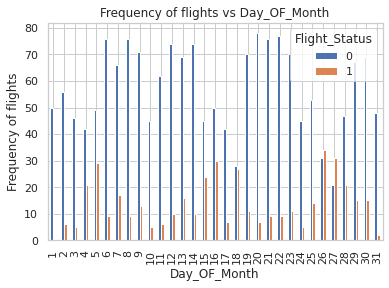

In [55]:
pd.crosstab(data.DAY_OF_MONTH,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs Day_OF_Month')
plt.xlabel('Day_OF_Month')
plt.ylabel('Frequency of flights')
plt.savefig('frequency_flight_month')

Day_of_month may divide the flight delay data in a good way, but because of high number of attributes this may not be the most  preferable one.

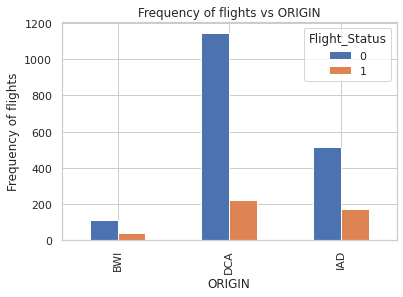

In [56]:
pd.crosstab(data.ORIGIN,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs ORIGIN')
plt.xlabel('ORIGIN')
plt.ylabel('Frequency of flights')
plt.savefig('origin_frequebcy_flights_bar')

Origin also looks like a good classifier.

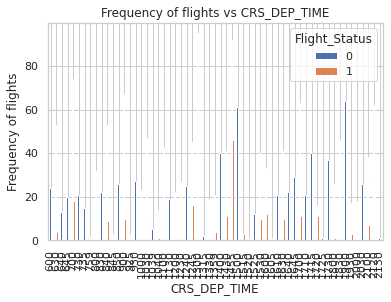

In [58]:
pd.crosstab(data.CRS_DEP_TIME,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs CRS_DEP_TIME')
plt.xlabel('CRS_DEP_TIME')
plt.ylabel('Frequency of flights')
plt.savefig('CRS_fre_frequency_bar')

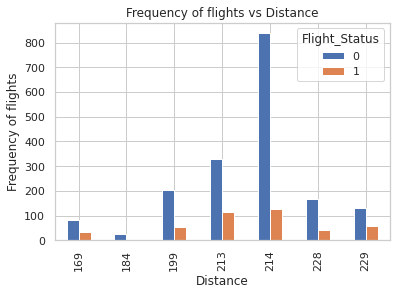

In [59]:
pd.crosstab(data.DISTANCE,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency of flights')
plt.savefig('Distance_fre_frequency_bar')

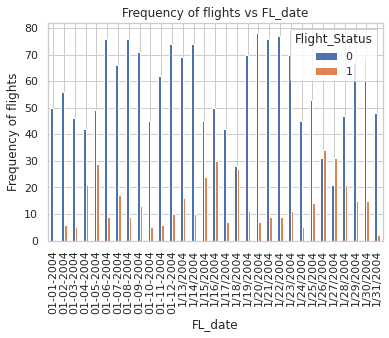

In [60]:


pd.crosstab(data.FL_DATE,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs FL_date')
plt.xlabel('FL_date')
plt.ylabel('Frequency of flights')
plt.savefig('fl_date_fre_frequency_bar')

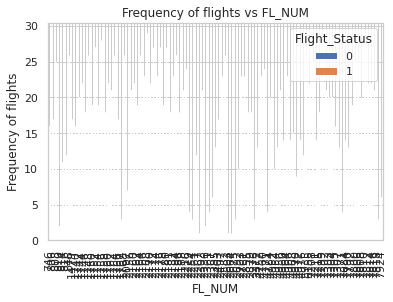

In [62]:
pd.crosstab(data.FL_NUM,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs FL_NUM')
plt.xlabel('FL_NUM')
plt.ylabel('Frequency of flights')
plt.savefig('fl_num_fre_frequency_bar')

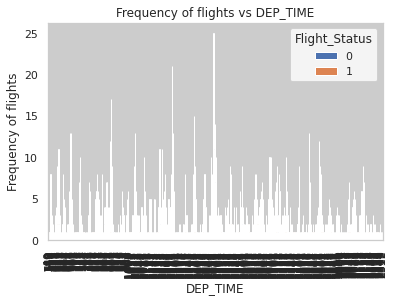

In [63]:
pd.crosstab(data.DEP_TIME,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs DEP_TIME')
plt.xlabel('DEP_TIME')
plt.ylabel('Frequency of flights')
plt.savefig('DEP_TIME_fre_frequency_bar')

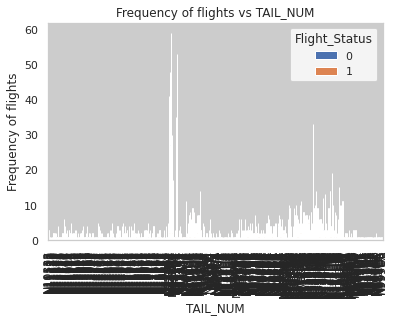

In [64]:
pd.crosstab(data.TAIL_NUM,data.Flight_Status).plot(kind='bar')
plt.title('Frequency of flights vs TAIL_NUM')
plt.xlabel('TAIL_NUM')
plt.ylabel('Frequency of flights')
plt.savefig('tail_fre_frequency_bar')

Because of too many attributes TAIL_NUM is not a good classfier.
By same argument FL_NUM may not be good classfier because of too many attributes. So, we have to drop these columns.

In [65]:
data = data.drop(["TAIL_NUM" ], axis=1)

In [66]:
data.shape

(2201, 12)

In [67]:
data

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight_Status
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,0
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,0
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,0
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,0
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,0
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,0
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,0
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,0


In [69]:
data = data.drop(["FL_NUM" ], axis=1)

In [70]:
data.shape

(2201, 11)

In [71]:
data

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight_Status
0,1455,OH,1455,JFK,184,01-01-2004,BWI,0,4,1,0
1,1640,DH,1640,JFK,213,01-01-2004,DCA,0,4,1,0
2,1245,DH,1245,LGA,229,01-01-2004,IAD,0,4,1,0
3,1715,DH,1709,LGA,229,01-01-2004,IAD,0,4,1,0
4,1039,DH,1035,LGA,229,01-01-2004,IAD,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,DCA,0,6,31,0
2197,1700,RU,1653,EWR,213,1/31/2004,IAD,0,6,31,0
2198,1600,RU,1558,EWR,199,1/31/2004,DCA,0,6,31,0
2199,1359,RU,1403,EWR,199,1/31/2004,DCA,0,6,31,0


In [72]:
import statsmodels.api as sm
import pandas as pd
import pylab as pl
import numpy as np

In [73]:
## creating dummy variables
dummy_carrier = pd.get_dummies(data["CARRIER"], prefix="CARRIER")
data = data.drop(["CARRIER"], axis=1)
data = data.join(dummy_carrier)
print(data.shape)

(2201, 18)


In [74]:

dummy_dest = pd.get_dummies(data["DEST"], prefix="DEST")
data = data.drop(["DEST"], axis=1)
data = data.join(dummy_dest)
print(data.shape)

(2201, 20)


In [75]:

dummy_day_week = pd.get_dummies(data["DAY_WEEK"], prefix="DAY_WEEK")
data = data.drop(["DAY_WEEK"], axis=1)
print(data.shape)
data = data.join(dummy_day_week)
print(data.shape)

(2201, 19)
(2201, 26)


In [76]:
dummy_origin = pd.get_dummies(data["ORIGIN"], prefix="ORIGIN")
data = data.drop(["ORIGIN"], axis=1)
print(data.shape)
data = data.join(dummy_origin)
print(data.shape)

(2201, 25)
(2201, 28)


In [77]:
dummy_distance = pd.get_dummies(data["DISTANCE"], prefix="DISTANCE")
data = data.drop(["DISTANCE"], axis=1)
print(data.shape)
data = data.join(dummy_distance)
print(data.shape)

(2201, 27)
(2201, 34)


In [78]:
dummy_DAY_OF_MONTH = pd.get_dummies(data["DAY_OF_MONTH"], prefix="DAY_OF_MONTH")
data = data.drop(["DAY_OF_MONTH"], axis=1)
print(data.shape)
data = data.join(dummy_DAY_OF_MONTH)
print(data.shape)

(2201, 33)
(2201, 64)


In [79]:
data = data.drop(["FL_DATE"], axis = 1)


In [80]:
data

,CRS_DEP_TIME,DEP_TIME,Weather,Flight_Status,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,DEST_LGA,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DISTANCE_169,DISTANCE_184,DISTANCE_199,DISTANCE_213,DISTANCE_214,DISTANCE_228,DISTANCE_229,DAY_OF_MONTH_1,DAY_OF_MONTH_2,DAY_OF_MONTH_3,DAY_OF_MONTH_4,DAY_OF_MONTH_5,DAY_OF_MONTH_6,DAY_OF_MONTH_7,DAY_OF_MONTH_8,DAY_OF_MONTH_9,DAY_OF_MONTH_10,DAY_OF_MONTH_11,DAY_OF_MONTH_12,DAY_OF_MONTH_13,DAY_OF_MONTH_14,DAY_OF_MONTH_15,DAY_OF_MONTH_16,DAY_OF_MONTH_17,DAY_OF_MONTH_18,DAY_OF_MONTH_19,DAY_OF_MONTH_20,DAY_OF_MONTH_21,DAY_OF_MONTH_22,DAY_OF_MONTH_23,DAY_OF_MONTH_24,DAY_OF_MONTH_25,DAY_OF_MONTH_26,DAY_OF_MONTH_27,DAY_OF_MONTH_28,DAY_OF_MONTH_29,DAY_OF_MONTH_30,DAY_OF_MONTH_31
0,1455,1455,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1640,1640,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1245,1245,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1715,1709,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1039,1035,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,644,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2197,1700,1653,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2198,1600,1558,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2199,1359,1403,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [81]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [82]:
## creating X and Y matrices
X = data.loc[:, data.columns != 'Flight_Status']
y = data.loc[:, data.columns == 'Flight_Status']
## splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1, test_size=0.40)
print("Size of train set: ",len(X_train))
print("Size of test set: ", len(X_test))
print("Sample training data:")
pd.concat((X_train,y_train),axis=1).head(6)

Size of train set:  1320
Size of test set:  881
Sample training data:


,CRS_DEP_TIME,DEP_TIME,Weather,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,DEST_LGA,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,DISTANCE_169,DISTANCE_184,DISTANCE_199,DISTANCE_213,DISTANCE_214,DISTANCE_228,DISTANCE_229,DAY_OF_MONTH_1,DAY_OF_MONTH_2,DAY_OF_MONTH_3,DAY_OF_MONTH_4,DAY_OF_MONTH_5,DAY_OF_MONTH_6,DAY_OF_MONTH_7,DAY_OF_MONTH_8,DAY_OF_MONTH_9,DAY_OF_MONTH_10,DAY_OF_MONTH_11,DAY_OF_MONTH_12,DAY_OF_MONTH_13,DAY_OF_MONTH_14,DAY_OF_MONTH_15,DAY_OF_MONTH_16,DAY_OF_MONTH_17,DAY_OF_MONTH_18,DAY_OF_MONTH_19,DAY_OF_MONTH_20,DAY_OF_MONTH_21,DAY_OF_MONTH_22,DAY_OF_MONTH_23,DAY_OF_MONTH_24,DAY_OF_MONTH_25,DAY_OF_MONTH_26,DAY_OF_MONTH_27,DAY_OF_MONTH_28,DAY_OF_MONTH_29,DAY_OF_MONTH_30,DAY_OF_MONTH_31,Flight_Status
1215,2120,2110,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1476,700,659,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1897,900,858,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
83,1300,1258,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1172,1455,1509,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1720,1300,1252,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [83]:
## scaling the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
## training the model
classifier = LogisticRegression(penalty='l2', tol=1e-6, max_iter=10000)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [85]:
## making predictions on test set
y_pred = classifier.predict(X_test)

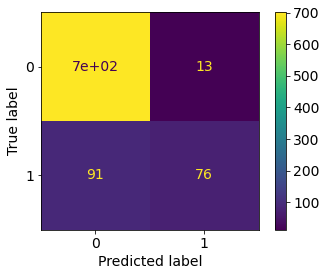

In [86]:
## Model Performance
class_labels = data["Flight_Status"].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
sns.reset_orig()
disp.plot()

In [88]:
## classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       714
           1       0.85      0.46      0.59       167

    accuracy                           0.88       881
   macro avg       0.87      0.72      0.76       881
weighted avg       0.88      0.88      0.87       881



In [89]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.8819523269012486


In [90]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.322684
         Iterations: 35
                                    Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.345      
Dependent Variable:         Flight_Status          AIC:                    1514.4569  
Date:                       2021-05-11 15:42       BIC:                    1782.2003  
No. Observations:           2201                   Log-Likelihood:         -710.23    
Df Model:                   46                     LL-Null:                -1084.3    
Df Residuals:               2154                   LLR p-value:            1.3790e-127
Converged:                  0.0000                 Scale:                  1.0000     
No. Iterations:             35.0000                                                   
--------------------------------------------------------------------------------------
                 Coef.      Std.Err.       z     P>|z|       [0.025         0.975]    
-------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [91]:
data1 = data.drop(["Flight_Status"], axis = 1)

Now we will be using RFE(Recursive Feature Elimination) to elminate few features to reduce the size and improve the accuracy of the model.

In [92]:
## Recursive Feature Elimination
## Creating new data set with remaining features
X_col = data1.iloc[:, :63]
log_odds = classifier.coef_[0]
pd.DataFrame(log_odds, X_col.columns, columns=['coef']).sort_values(by='coef', ascending=False)

odds = np.exp(classifier.coef_[0])
pd.DataFrame(odds, X_col.columns, columns=['coef']).sort_values(by='coef', ascending=False)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model,n_features_to_select = 55)

fit = rfe.fit(X, np.ravel(y))

a = X_col.columns
column_names=[]
for i in range(len(fit.ranking_)):
    if fit.ranking_[i]==1:
        column_names.append(a[i])

print(column_names)

['Weather', 'CARRIER_CO', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US', 'DEST_EWR', 'DEST_JFK', 'DEST_LGA', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4', 'DAY_WEEK_5', 'DAY_WEEK_6', 'ORIGIN_BWI', 'ORIGIN_DCA', 'ORIGIN_IAD', 'DISTANCE_169', 'DISTANCE_184', 'DISTANCE_199', 'DISTANCE_213', 'DISTANCE_214', 'DISTANCE_229', 'DAY_OF_MONTH_1', 'DAY_OF_MONTH_2', 'DAY_OF_MONTH_3', 'DAY_OF_MONTH_4', 'DAY_OF_MONTH_5', 'DAY_OF_MONTH_6', 'DAY_OF_MONTH_8', 'DAY_OF_MONTH_9', 'DAY_OF_MONTH_10', 'DAY_OF_MONTH_11', 'DAY_OF_MONTH_12', 'DAY_OF_MONTH_13', 'DAY_OF_MONTH_14', 'DAY_OF_MONTH_15', 'DAY_OF_MONTH_16', 'DAY_OF_MONTH_17', 'DAY_OF_MONTH_18', 'DAY_OF_MONTH_19', 'DAY_OF_MONTH_20', 'DAY_OF_MONTH_21', 'DAY_OF_MONTH_22', 'DAY_OF_MONTH_25', 'DAY_OF_MONTH_26', 'DAY_OF_MONTH_27', 'DAY_OF_MONTH_28', 'DAY_OF_MONTH_29', 'DAY_OF_MONTH_30', 'DAY_OF_MONTH_31']


In [93]:
## Splitting data set
X1 = data[column_names].values
Y1 = data["Flight_Status"].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, shuffle=True, random_state=1, test_size=0.40)

print("Number of train samples: ", len(X_train1))
print("Number of test samples: ", len(X_test1))

Number of train samples:  1320
Number of test samples:  881


In [94]:
## scaling the data 
scaler1 = StandardScaler()
scaler1.fit(X_train1)
X_train1 = scaler1.transform(X_train1)
X_test1 = scaler1.transform(X_test1)

In [95]:
## Trainig the model
classifier1 = LogisticRegression(penalty='l2', tol=1e-6, max_iter=100)
classifier1.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [96]:
## making predictions
y_pred1 = classifier1.predict(X_test1)

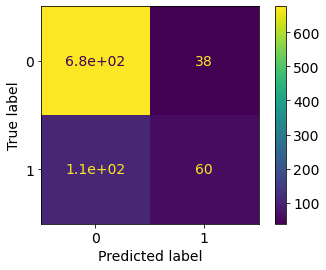

In [97]:

## Model Performance
class_labels1 = data["Flight_Status"].unique()
cm1 = confusion_matrix(y_test1, y_pred1, labels=class_labels1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels1)
sns.reset_orig()
disp1.plot()

In [98]:

## classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       714
           1       0.61      0.36      0.45       167

    accuracy                           0.84       881
   macro avg       0.74      0.65      0.68       881
weighted avg       0.82      0.84      0.82       881



In [99]:
print("Accuracy: ", accuracy_score(y_test1,y_pred1))

Accuracy:  0.8354143019296254
